In [ ]:
!pip install contexto
!pip install matplotlib==3.1.3

import re
import string
import matplotlib.pyplot as plt
import nltk
import matplotlib.cm as cm


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag_sents
from nltk.corpus import wordnet
from contexto.limpieza import *
from contexto.utils.limpieza_aux import *
from contexto.exploracion import nube_palabras, grafica_barchart_frecuencias
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

plt.style.context('dark_background')
nltk.download('all')
stop = stopwords.words('spanish')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 136 kB 4.3 MB/s 
     |████████████████████████████████| 1.6 MB 41.0 MB/s 
     |████████████████████████████████| 90 kB 10.7 MB/s 
     |████████████████████████████████| 2.6 MB 43.3 MB/s 
     |████████████████████████████████| 1.5 MB 40.3 MB/s 
     |████████████████████████████████| 11.2 MB 34.3 MB/s 
     |████████████████████████████████| 2.7 MB 32.8 MB/s 
     |████████████████████████████████| 23.9 MB 66.1 MB/s 
     |████████████████████████████████| 5.6 MB 33.4 MB/s 
     |████████████████████████████████| 1.9 MB 35.2 MB/s 
     |████████████████████████████████| 574 kB 4.9 MB/s 
     |████████████████████████████████| 77 kB 3.3 MB/s 
     |████████████████████████████████| 100 kB 10.1 MB/s 
     |████████████████████████████████| 956 kB 44.0 MB/s 
     |████████████████████████████████| 197 kB 43.6 MB/s 
     |████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contexto 0.2.0 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perc

In [ ]:
df = pd.read_csv('file.csv')

In [ ]:
df.text = df.text.astype(str)

In [ ]:
trans = str.maketrans('áéíóúü', 'aeiouu')
URL_PATTERN = r'[A-Za-z0-9:]+://[A-Za-z0-9%-_]+(/[A-Za-z0-9%-_])*(#|\\?)[A-Za-z0-9%-_&=]*'
df.text = df.text.str.replace(URL_PATTERN, '', regex = True)
df.text = df.text.apply(lambda x: x.translate(trans))
df.text = df.text.apply(lambda x: x.lower())

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    #print(tag)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def process_tweet(tweet, stopwords_new, stem = False, lemma = True):
    """Process sentences function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    lemmatizer = WordNetLemmatizer()

    for word in tweet_tokens:
        if (word not in stopwords_new and word not in string.punctuation and word != ""):
          lemma_word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
          tweets_clean.append(lemma_word)
    return ' '.join(tweets_clean)

In [ ]:
df["TweetPre"]= df.text.apply(limpieza_basica)
df["TweetPre"] = df["TweetPre"].apply(remover_acentos)
df["TweetPre"] = df["TweetPre"].apply(remover_palabras_cortas, n_min = 4)
df["TweetPre"] = df["TweetPre"].apply(process_tweet, stopwords_new = stop)
df = df[df["TweetPre"].notnull()]

In [ ]:
dfpre = df.copy()

In [ ]:
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'hola', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'buenas', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'tarde', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'noche', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'buenos', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'quisiera saber', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'muchas gracias', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'cedula', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'correo', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'telefono', '', regex=True)
dfpre['TweetPre'] = dfpre['TweetPre'].str.replace(r'electronico', '', regex=True)
dfpre["TweetPre"] = dfpre["TweetPre"].apply(remover_palabras_cortas, n_min = 4)

In [ ]:
CleanData = dfpre[dfpre['TweetPre'].notnull()]
CleanData.drop_duplicates(subset='TweetPre', inplace=True)
texto = ' '.join(CleanData['TweetPre'].to_list())
texts = CleanData.TweetPre
data_arr = CleanData.TweetPre.apply(lambda x: x.split()).to_list()

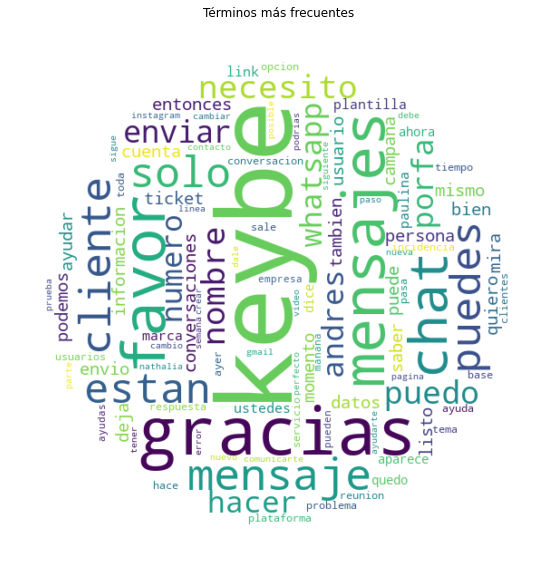

In [ ]:
nube_palabras(texto, n_grama=1, dim_figura = (15, 10), ubicacion_archivo= "bigrams")

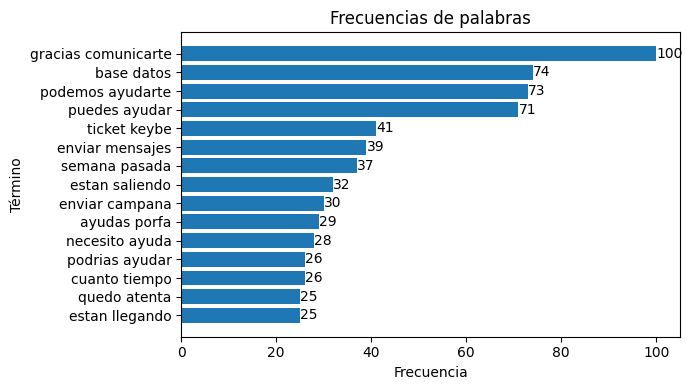

In [ ]:
ax = grafica_barchart_frecuencias(texto, ubicacion_archivo='bi_bars.png', n_grama=2, titulo='Frecuencias de palabras', dim_figura=(7,4), devolver_grafica=True)

In [ ]:
df.text.str.contains('jobid', regex=False).value_counts()

False    26176
Name: text, dtype: int64

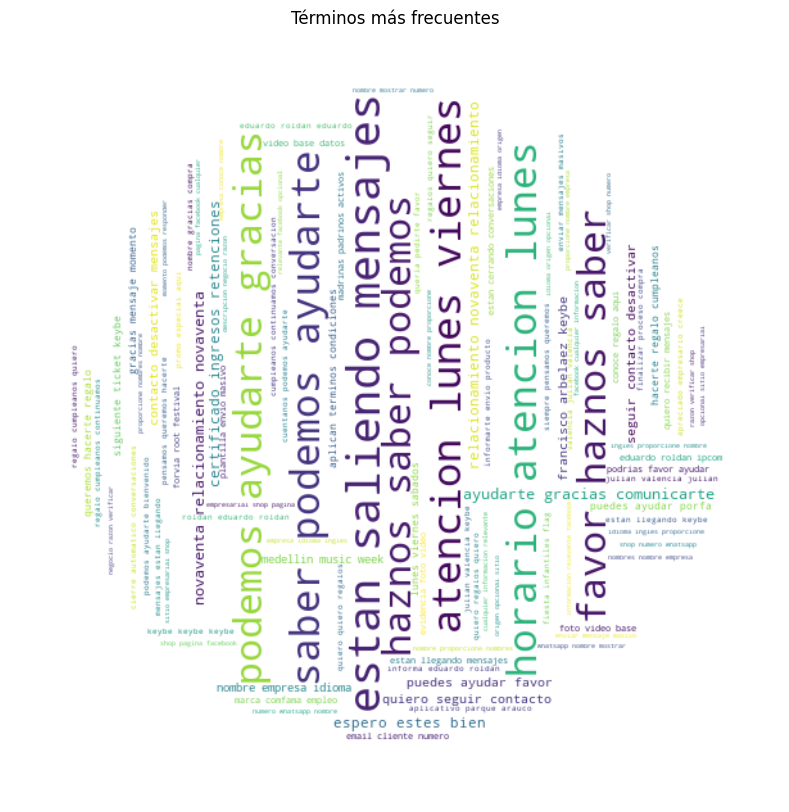

In [ ]:
nube_palabras(texto, n_grama=3, dim_figura = (15, 10), ubicacion_archivo= "trigrams")

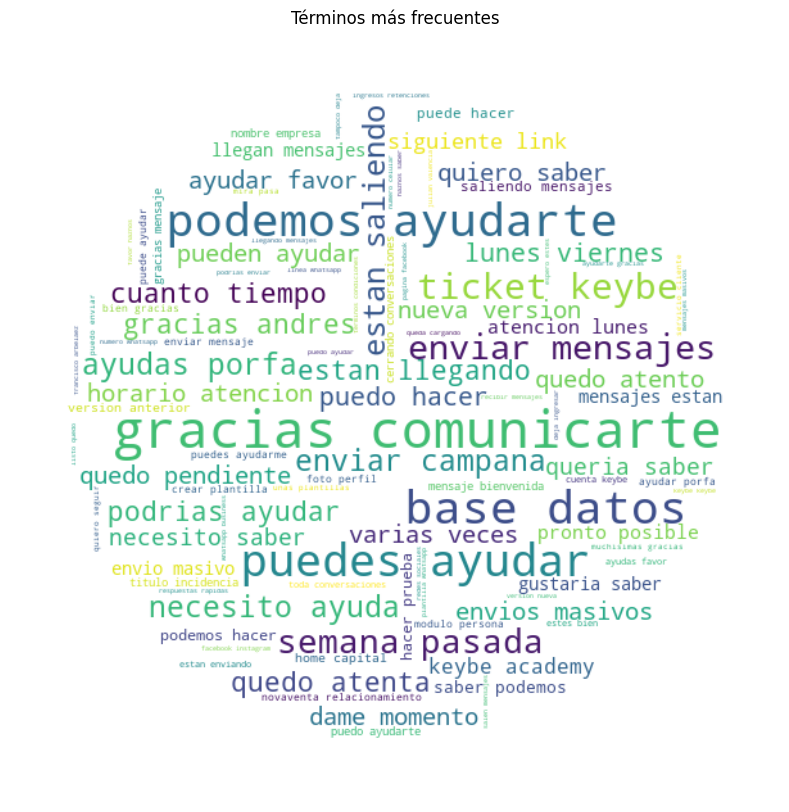

In [ ]:
nube_palabras(texto, n_grama=2, dim_figura = (15, 10), ubicacion_archivo= "bigrams")

In [ ]:
texto

' nathalia soporte nivel momento gracias sabes internacional llevan poder cargar base datos entiendo natalian tambien carga realizamos pruebas cliente nunca carga puede respuesta paulina pueden webchat funcionando pueden ayudar persona rubinstein muestran linea busco sale linea serum pasando duros mira grabajdo llamada ahora mostrar mira misma grabacion pantalla mismo pasos cosas muestran tener mira video muestra preocupa cuenta computador puedo datos entro perfil andres incluso cree lograba veia andres ayudas poner tarea fintech marca notcool entro bono dolares amigo casa interno ayudas tarea fintech cambiar factura udem enero poder cobrar tarea gracias datos pasen facturarlo acabo crear cuenta quiero aprender usar keybe abriendo conversaciones keybe academy quedando pendejo aqui abrir conversacion persona envio puse numero nuevo parecer llego mismo numero nathanlia vieste escribe hablaras nunca paso seguro pasa paulina tareas video arriba empresas estan haciendo campana facebook what

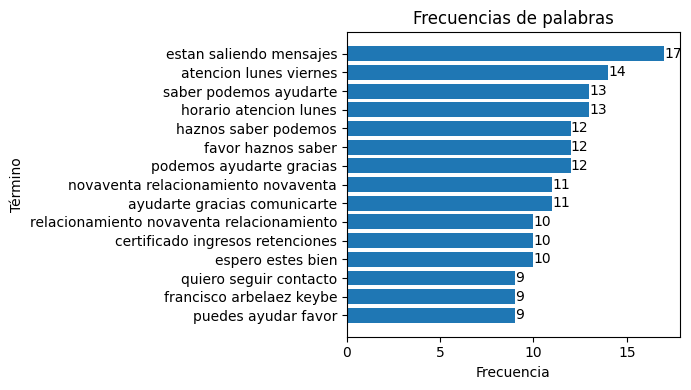

In [ ]:
plt.style.use('dark_background')
grafica_barchart_frecuencias(texto, ubicacion_archivo='tri_bars.png', n_grama=3, titulo='Frecuencias de palabras', dim_figura=(7,4))

# word2vec

In [ ]:
w2v_model = Word2Vec(min_count=40, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)
w2v_model.build_vocab(data_arr, progress_per=10000)
w2v_model.train(data_arr, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(120348, 1830240)

In [ ]:
import numpy as np


In [ ]:
def tsne_plot(model, word):
    "Creates and TSNE model and plots it"
    vocab = []
    color = []
    label = []
    for k, i in enumerate(word):
      if i not in vocab:
        vocab.append(i)
        color.append(k)
        label.append(i)
      for j in w2v_model.wv.most_similar(i, topn = 10):
        if j[0] not in vocab:
          color.append(k)
          vocab.append(j[0])
          label.append(i)

    labels = []
    tokens = []
    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=70,
                      n_components=2, 
                      init='pca',
                      n_iter=4000,
                      random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(10, 5))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    plt.scatter(x,y, c=colors, alpha=0.7, label=label)
    for i in range(len(x)):
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.grid(True)
    plt.show()
tsne_plot(w2v_model, ["incidencia", "problemas", "whatsapp", "keybe", "empresa", "servicio", "actualizacion", "campana"])

KeyError: ignored

In [ ]:
tsne_plot(w2v_model, ["incidencia", "problemas", "whatsapp", "keybe", "empresa", "servicio", "actualizacion", "campana"])

In [ ]:
def tsne_plot2(model):
    "Creates and TSNE model and plots it"
    vocab = list(model.wv.key_to_index)
    
    labels = []
    tokens = []
    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10,
                      n_components=2, 
                      init='pca',
                      n_iter=4000,
                      random_state=123)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 9))
    plt.scatter(x,y, alpha=0.7)
    for i in range(len(x)):
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(3, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.grid(True)
    plt.show()

In [ ]:
tsne_plot2(w2v_model)

In [ ]:
def tsne_plot3D(model):
    "Creates and TSNE model and plots it"
    vocab = list(model.wv.key_to_index)
    
    labels = []
    tokens = []
    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20,
                      n_components=3, 
                      init='pca',
                      n_iter=4000,
                      random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        z.append(value[2])
    fig = plt.figure(figsize = (19, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x,y,z, alpha=0.7)
    for i in range(len(x)):
        ax.text(x[i], y[i], z[i], labels[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

In [ ]:
tsne_plot3D(w2v_model)

In [ ]:

from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel
dictionary = Dictionary(data_arr)
corpus = [dictionary.doc2bow(text) for text in data_arr]
lda_model = LdaModel(corpus=corpus, id2word=dictionary,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model.show_topics()

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
!pip install  pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
